<a href="https://colab.research.google.com/github/anokh-surpur/Hand_detection/blob/main/Hand.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("nomihsa965/hand-detection-dataset-vocyolo-format")

print("Path to dataset files:", path)

100%|██████████| 73.7M/73.7M [00:00<00:00, 82.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1


In [2]:
import os

# Path to the dataset directory
dataset_path = "/root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1"

# List all files and folders in the dataset directory
for root, dirs, files in os.walk(dataset_path):
    print(f"Directory: {root}")



Directory: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1
Directory: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/test
Directory: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/test/labels
Directory: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/test/labels/VOC
Directory: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/test/labels/YOLO
Directory: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/test/images
Directory: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train
Directory: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/labels
Directory: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/ver

Displaying training images:


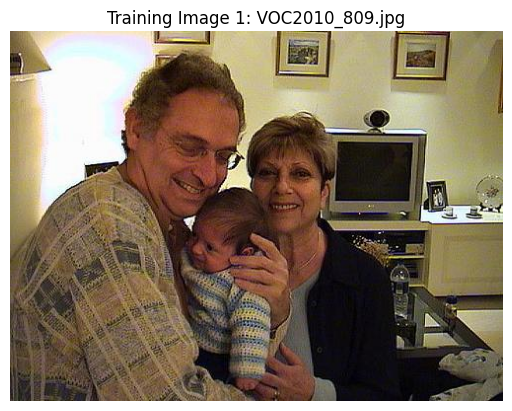

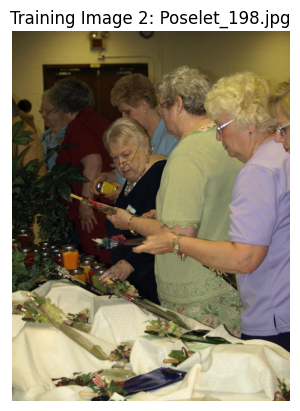

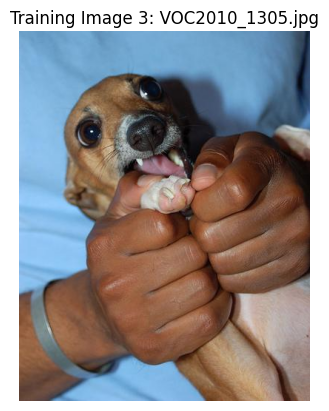

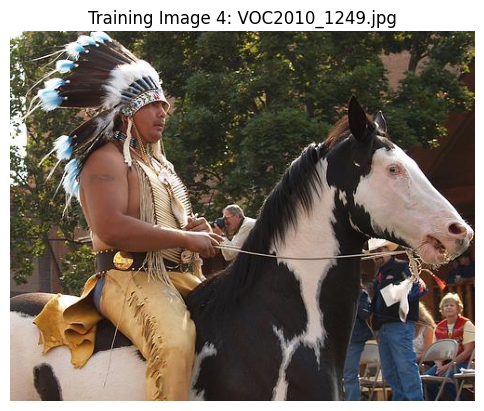

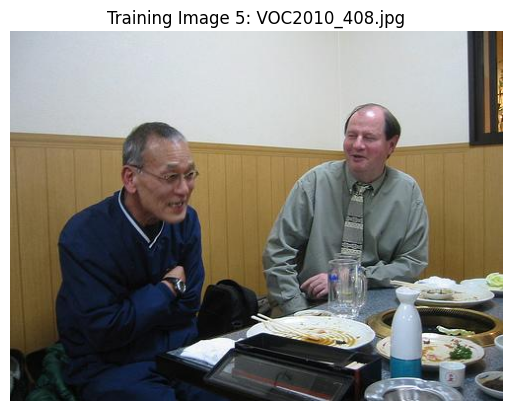

Displaying testing images:


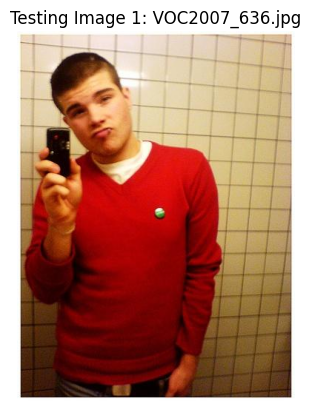

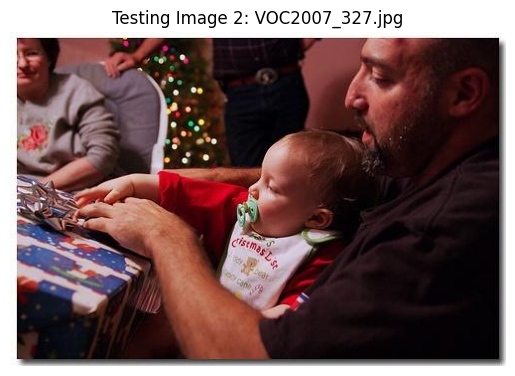

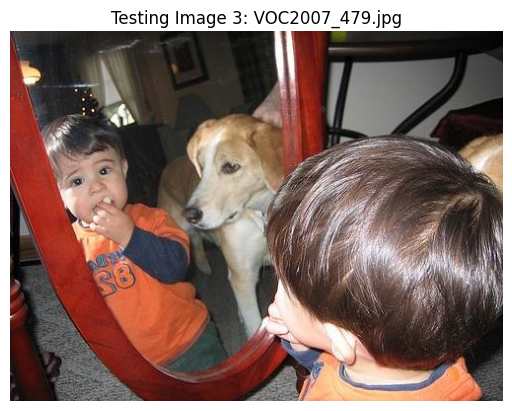

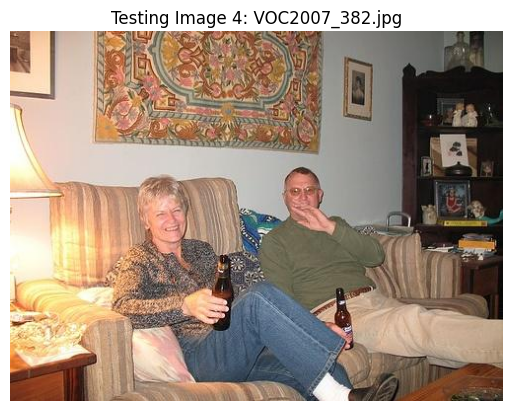

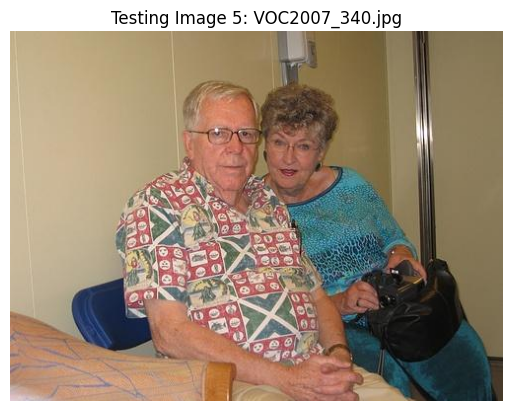

In [3]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Paths to the image directories
train_images_path = "/root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/images"
test_images_path = "/root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/test/images"

# Function to display images from a given directory
def display_images(directory, title_prefix, num_images=5):
    image_files = [f for f in os.listdir(directory) if f.endswith(('.png', '.jpg', '.jpeg'))]
    for i, image_file in enumerate(image_files[:num_images]):
        image_path = os.path.join(directory, image_file)
        img = imread(image_path)
        plt.figure()
        plt.imshow(img)
        plt.title(f"{title_prefix} Image {i+1}: {image_file}")
        plt.axis('off')
        plt.show()

# Display training images
print("Displaying training images:")
display_images(train_images_path, "Training")

# Display testing images
print("Displaying testing images:")
display_images(test_images_path, "Testing")

In [4]:
# Paths to dataset directories
train_images_dir = "/root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/images"
train_labels_dir = "/root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/labels/YOLO"

test_images_dir = "/root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/test/images"
test_labels_dir = "/root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/test/labels/YOLO"

# Function to validate label files
def validate_labels(images_dir, labels_dir):
    missing_labels = []
    invalid_labels = []

    for image_file in os.listdir(images_dir):
        if image_file.endswith((".jpg", ".png", ".jpeg")):
            label_file = os.path.splitext(image_file)[0] + ".txt"
            label_path = os.path.join(labels_dir, label_file)

            if not os.path.exists(label_path):
                missing_labels.append(image_file)
            else:
                # Check if label file has valid format
                with open(label_path, "r") as file:
                    for line in file:
                        parts = line.strip().split()
                        if len(parts) != 5 or not all(p.replace('.', '', 1).isdigit() for p in parts[1:]):
                            invalid_labels.append(label_file)
                            break

    return missing_labels, invalid_labels

# Validate train and test sets
train_missing, train_invalid = validate_labels(train_images_dir, train_labels_dir)
test_missing, test_invalid = validate_labels(test_images_dir, test_labels_dir)

# Print results
print("Train set validation:")
print(f"Missing labels: {len(train_missing)}")
print(f"Invalid labels: {len(train_invalid)}")
if train_missing:
    print("Missing labels for images:", train_missing)
if train_invalid:
    print("Invalid label files:", train_invalid)

print("\nTest set validation:")
print(f"Missing labels: {len(test_missing)}")
print(f"Invalid labels: {len(test_invalid)}")
if test_missing:
    print("Missing labels for images:", test_missing)
if test_invalid:
    print("Invalid label files:", test_invalid)


Train set validation:
Missing labels: 0
Invalid labels: 0

Test set validation:
Missing labels: 0
Invalid labels: 0


In [5]:
# Updated YAML content including labels
yaml_content = """
train: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/images
val: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/test/images

nc: 1  # Number of classes (hand detection has 1 class)
names: ['hand']  # Class names
"""

# Path to save the updated YAML file
yaml_file_path = "dataset.yaml"

# Save the content to the dataset.yaml file
with open(yaml_file_path, "w") as file:
    file.write(yaml_content)

print(f"dataset.yaml file created at: {yaml_file_path}")


dataset.yaml file created at: dataset.yaml


In [6]:
with open('/content/dataset.yaml', 'r') as file:
    print(file.read())



train: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/images
val: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/test/images

nc: 1  # Number of classes (hand detection has 1 class)
names: ['hand']  # Class names



In [7]:
import glob

# Display some label files
label_files = glob.glob(f"{train_labels_dir}/*.txt")
for label_file in label_files[:5]:
    print(f"Contents of {label_file}:")
    with open(label_file, 'r') as file:
        print(file.read())


Contents of /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/labels/YOLO/VOC2007_51.txt:
0 0.462 0.43466666666666665 0.236 0.32266666666666666

Contents of /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/labels/YOLO/VOC2010_906.txt:
0 0.832 0.7626666666666667 0.178 0.24

Contents of /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/labels/YOLO/VOC2007_396.txt:
0 0.4624624624624625 0.54 0.11411411411411411 0.078
0 0.2702702702702703 0.51 0.12612612612612611 0.078

Contents of /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/labels/YOLO/VOC2010_882.txt:
0 0.536 0.12533333333333332 0.09 0.144
0 0.854 0.3413333333333333 0.076 0.12533333333333332

Contents of /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/labels/YOLO/VOC2010_1233.txt:
0 0.17 0.752 

In [8]:
import shutil

def move_labels_to_root(label_root, subfolder):
    # Define the source and destination directories
    source_dir = os.path.join(label_root, subfolder)
    destination_dir = label_root

    # Ensure the source directory exists
    if not os.path.exists(source_dir):
        print(f"Source directory '{source_dir}' does not exist.")
        return

    # Move all .txt files from the source to the destination
    for filename in os.listdir(source_dir):
        if filename.endswith('.txt'):
            src_path = os.path.join(source_dir, filename)
            dest_path = os.path.join(destination_dir, filename)
            shutil.move(src_path, dest_path)
            print(f"Moved: {src_path} -> {dest_path}")

    # Optional: Remove the now-empty subfolder
    if not os.listdir(source_dir):
        os.rmdir(source_dir)
        print(f"Removed empty folder: {source_dir}")

# Example usage
move_labels_to_root(
    label_root='/root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/labels',
    subfolder='YOLO'
)

Moved: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/labels/YOLO/VOC2007_51.txt -> /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/labels/VOC2007_51.txt
Moved: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/labels/YOLO/VOC2010_906.txt -> /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/labels/VOC2010_906.txt
Moved: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/labels/YOLO/VOC2007_396.txt -> /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/labels/VOC2007_396.txt
Moved: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/labels/YOLO/VOC2010_882.txt -> /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/tra

In [9]:
import os

def list_label_files(label_dir):
    for filename in os.listdir(label_dir):
        if filename.endswith('.txt'):
            print(filename)

list_label_files('/root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/labels')


VOC2007_51.txt
VOC2010_906.txt
VOC2007_396.txt
VOC2010_882.txt
VOC2010_1233.txt
VOC2010_1435.txt
VOC2010_593.txt
VOC2010_1176.txt
VOC2007_723.txt
VOC2010_992.txt
VOC2007_330.txt
VOC2007_774.txt
VOC2007_306.txt
VOC2010_426.txt
VOC2010_504.txt
VOC2010_120.txt
VOC2010_1163.txt
VOC2010_1099.txt
VOC2007_69.txt
Poselet_325.txt
Poselet_345.txt
VOC2010_1132.txt
VOC2010_813.txt
VOC2010_342.txt
VOC2010_576.txt
VOC2007_443.txt
VOC2010_397.txt
VOC2007_784.txt
Poselet_213.txt
VOC2010_726.txt
VOC2007_614.txt
VOC2010_1146.txt
VOC2010_373.txt
VOC2010_1408.txt
VOC2010_1089.txt
Poselet_52.txt
VOC2007_31.txt
VOC2007_46.txt
VOC2010_1095.txt
VOC2010_1211.txt
VOC2007_703.txt
VOC2010_298.txt
VOC2010_486.txt
VOC2010_208.txt
VOC2010_500.txt
VOC2007_636.txt
VOC2010_914.txt
VOC2010_315.txt
VOC2010_473.txt
Poselet_313.txt
VOC2007_159.txt
VOC2010_1070.txt
VOC2010_179.txt
VOC2010_591.txt
VOC2010_503.txt
VOC2010_349.txt
VOC2010_546.txt
VOC2007_712.txt
VOC2010_462.txt
VOC2007_587.txt
VOC2007_377.txt
Poselet_374.txt
V

In [10]:
import os
import shutil

def move_labels_to_root(label_root, subfolder):
    # Define the source and destination directories
    source_dir = os.path.join(label_root, subfolder)
    destination_dir = label_root

    # Ensure the source directory exists
    if not os.path.exists(source_dir):
        print(f"Source directory '{source_dir}' does not exist.")
        return

    # Move all .txt files from the source to the destination
    for filename in os.listdir(source_dir):
        if filename.endswith('.txt'):
            src_path = os.path.join(source_dir, filename)
            dest_path = os.path.join(destination_dir, filename)
            shutil.move(src_path, dest_path)
            print(f"Moved: {src_path} -> {dest_path}")

    # Optional: Remove the now-empty subfolder
    if not os.listdir(source_dir):
        os.rmdir(source_dir)
        print(f"Removed empty folder: {source_dir}")

# Example usage for test set
move_labels_to_root(
    label_root='/root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/test/labels',
    subfolder='YOLO'
)


Moved: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/test/labels/YOLO/VOC2007_51.txt -> /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/test/labels/VOC2007_51.txt
Moved: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/test/labels/YOLO/VOC2007_396.txt -> /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/test/labels/VOC2007_396.txt
Moved: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/test/labels/YOLO/VOC2010_107.txt -> /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/test/labels/VOC2010_107.txt
Moved: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/test/labels/YOLO/VOC2007_330.txt -> /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/test/label

In [11]:
%pip install ultralytics supervision roboflow
import ultralytics
ultralytics.checks()

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 32.6/112.6 GB disk)


In [12]:
 from ultralytics import YOLO

 model = YOLO("yolo11n.pt")

100%|██████████| 5.35M/5.35M [00:00<00:00, 95.4MB/s]


In [14]:
# Train the model using the correct argument syntax
results = model.train(data='/content/dataset.yaml', epochs=10, imgsz=416, batch=16)

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/dataset.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True

100%|██████████| 755k/755k [00:00<00:00, 24.1MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/labels... 1551 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1551/1551 [00:00<00:00, 1618.57it/s]

train: WARNING ⚠️ /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/images/Poselet_10.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/images/Poselet_180.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/images/Poselet_247.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/images/Poselet_268.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/images/Poselet_282.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/images/Poselet_290.jpg: 1 duplicate labels removed

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.0 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/test/labels... 510 images, 0 backgrounds, 0 corrupt: 100%|██████████| 510/510 [00:00<00:00, 1497.31it/s]

val: New cache created: /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/test/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10       1.1G      1.946      2.695      1.507         27        416: 100%|██████████| 97/97 [00:22<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.59it/s]

                   all        510       1003      0.575      0.325      0.413      0.176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      1.06G      1.852       2.05       1.47         27        416: 100%|██████████| 97/97 [00:20<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.91it/s]


                   all        510       1003      0.569      0.482      0.513      0.232

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      1.06G      1.861      1.916      1.484         28        416: 100%|██████████| 97/97 [00:22<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  3.07it/s]

                   all        510       1003      0.595      0.494      0.544      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      1.06G      1.822      1.807      1.465         24        416: 100%|██████████| 97/97 [00:21<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:03<00:00,  5.12it/s]


                   all        510       1003        0.5      0.387      0.396      0.172

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      1.06G      1.778       1.68      1.435         23        416: 100%|██████████| 97/97 [00:19<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.09it/s]

                   all        510       1003      0.645      0.557      0.618      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      1.06G      1.723      1.547      1.406         27        416: 100%|██████████| 97/97 [00:19<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.81it/s]

                   all        510       1003      0.659      0.581      0.629      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      1.06G      1.687      1.491      1.393         17        416: 100%|██████████| 97/97 [00:21<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.05it/s]

                   all        510       1003      0.713      0.618      0.704      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      1.06G      1.673      1.394       1.38         24        416: 100%|██████████| 97/97 [00:18<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.19it/s]

                   all        510       1003      0.777       0.68      0.776      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      1.06G      1.605      1.296      1.329         25        416: 100%|██████████| 97/97 [00:20<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:04<00:00,  3.50it/s]

                   all        510       1003      0.787       0.67      0.777      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      1.06G      1.584      1.245       1.31         29        416: 100%|██████████| 97/97 [00:22<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:02<00:00,  6.12it/s]

                   all        510       1003      0.847      0.675      0.811      0.422



10 epochs completed in 0.072 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,347 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 16/16 [00:05<00:00,  2.98it/s]


                   all        510       1003      0.847      0.678      0.812      0.422
Speed: 0.1ms preprocess, 1.4ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/train



image 1/1 /root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/images/Poselet_198.jpg: 416x320 4 hands, 74.4ms
Speed: 3.8ms preprocess, 74.4ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 320)


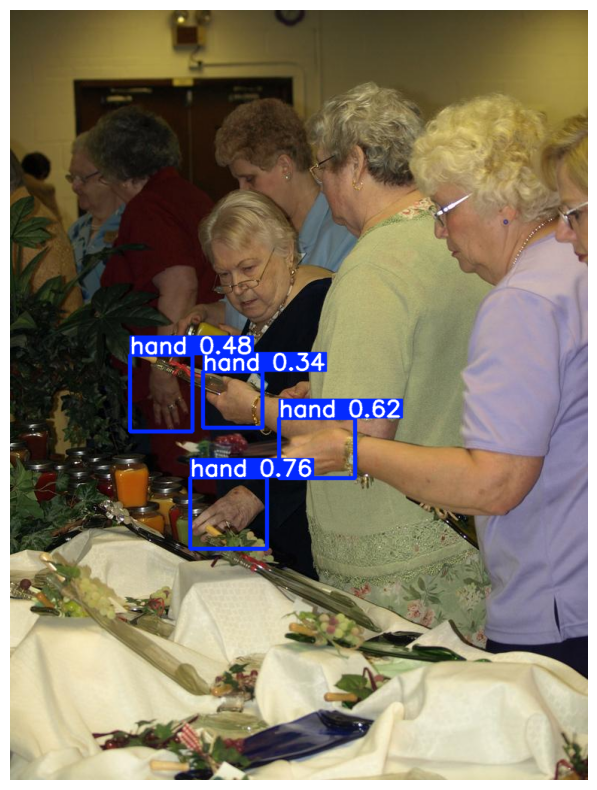

In [15]:
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model = YOLO("runs/detect/train/weights/best.pt")  # Path to your best model

# Path to the image you want to test
image_path = "/root/.cache/kagglehub/datasets/nomihsa965/hand-detection-dataset-vocyolo-format/versions/1/train/images/Poselet_198.jpg"

# Perform inference
results = model.predict(source=image_path, save=False, imgsz=416)

# Extract predictions
for result in results:
    img_with_boxes = result.plot()  # Draw bounding boxes on the image

# Display the image with bounding boxes
plt.figure(figsize=(10, 10))
plt.imshow(cv2.cvtColor(img_with_boxes, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [17]:
# Load the trained model
model = YOLO("runs/detect/train2/weights/best.pt")

# Open the laptop camera (0 is the default camera, change if necessary)
cap = cv2.VideoCapture(0)

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    if not ret:
        break

    # Perform inference on the frame
    results = model.predict(source=frame, imgsz=416, conf=0.5, save=False)

    # Extract predictions and draw bounding boxes
    for result in results:
        img_with_boxes = result.plot()  # Draw bounding boxes on the image

    # Display the resulting frame
    cv2.imshow('Real-time Object Detection', img_with_boxes)

    # Exit on pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release the camera and close all windows
cap.release()
cv2.destroyAllWindows()